# Regression Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# for resizing the graph
%matplotlib notebook
plt.ioff()    # this stops the graphs from overwriting each other

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Dividing the data into dependent and independent variables
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

# Linear Regression Example

In [7]:
#Fitting the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # Look at the documentation for more parameters.. Look at the output for default values
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


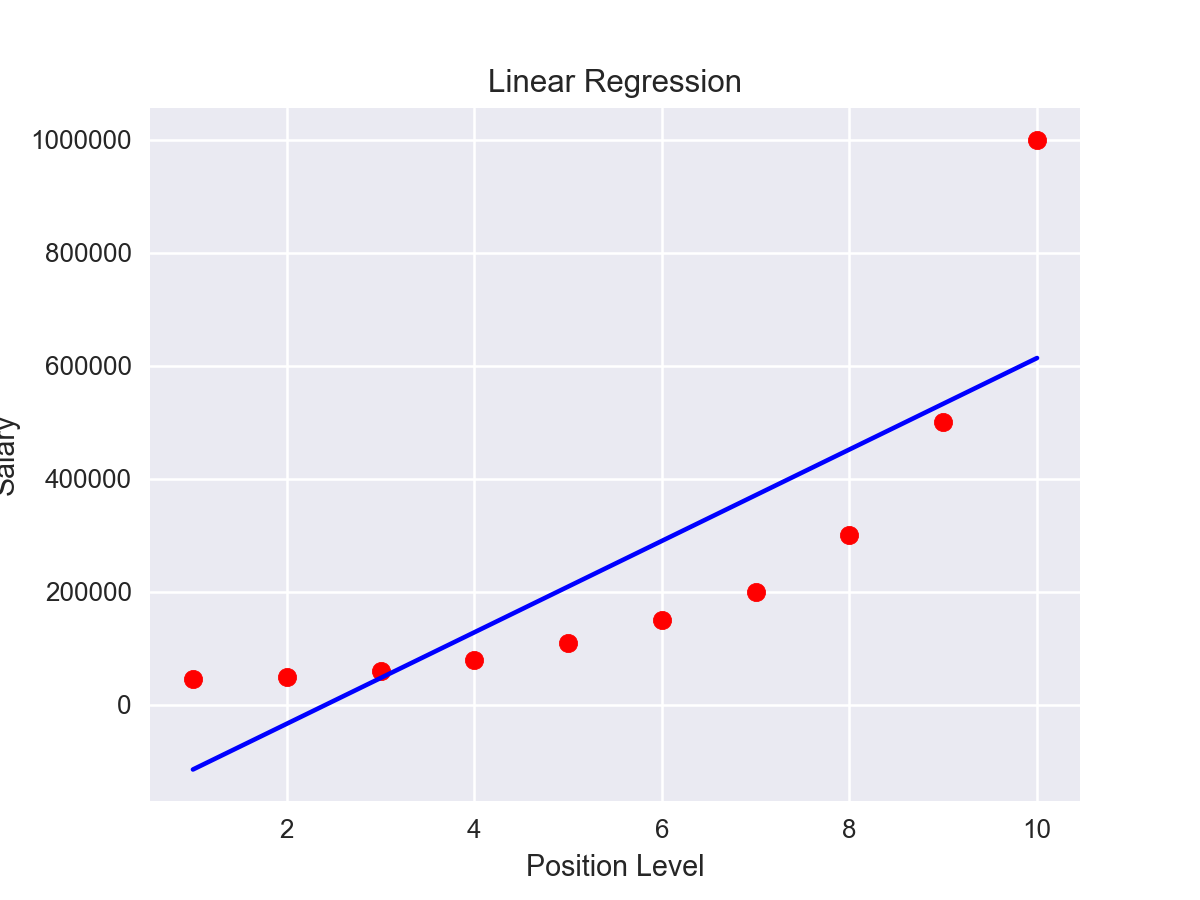

In [8]:
#Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue') # plotting the prediction in blue
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [9]:
lin_reg.score(X, y)

0.66904123319298947

In [10]:
lin_reg.predict(6.5) # Prediction 

array([ 330378.78787879])

# Polynomial Regression Example

In [30]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3) # Try different degrees. See how the accuracy increases with higher degree
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
X_poly

array([[    1.,     1.,     1.,     1.],
       [    1.,     2.,     4.,     8.],
       [    1.,     3.,     9.,    27.],
       [    1.,     4.,    16.,    64.],
       [    1.,     5.,    25.,   125.],
       [    1.,     6.,    36.,   216.],
       [    1.,     7.,    49.,   343.],
       [    1.,     8.,    64.,   512.],
       [    1.,     9.,    81.,   729.],
       [    1.,    10.,   100.,  1000.]])

<IPython.core.display.Javascript object>


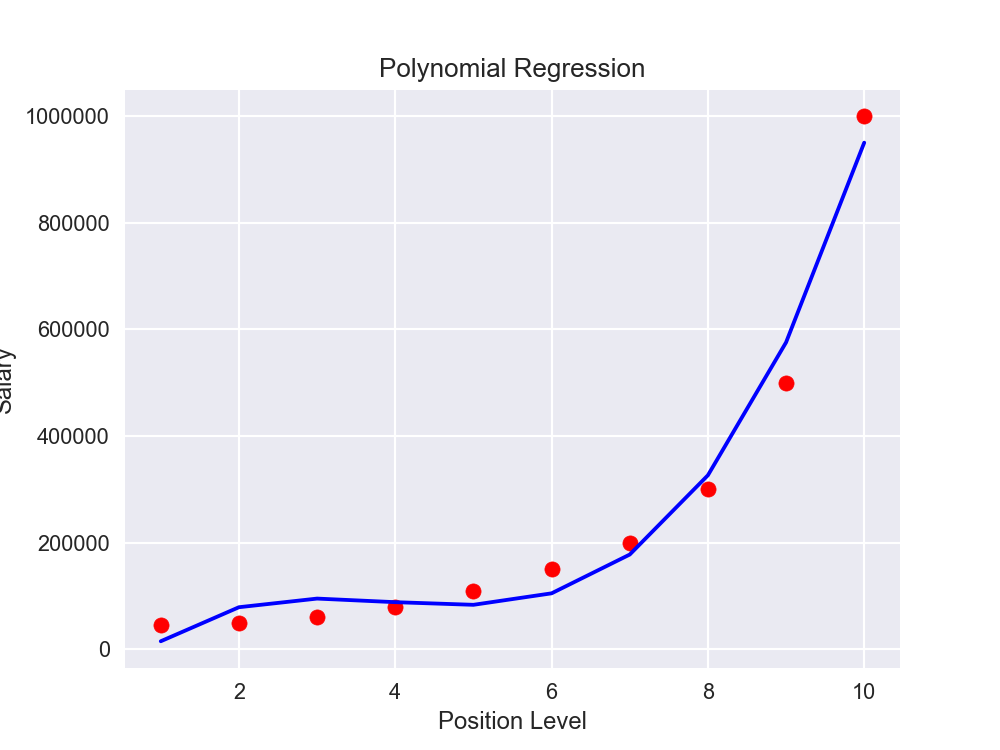

In [32]:
#Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [13]:
lin_reg_2.score(X_poly, y)

0.91620822214439424

In [14]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([ 189498.10606061])

# SVR Regression Examples

In [15]:
#SVR example 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X) # Here we need to scale our data for better fitting
y_scaled = sc_y.fit_transform(y)

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [16]:
#Fitting SVR to dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf') # Look at the various kernels available
svr_reg.fit(X_scaled, y_scaled) # fitting the scaled data

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
 # We need to transfrom the data before we give the input and inverse transform to see the unscaled value
y_pred = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(np.array([6.5]))))

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [18]:
y_pred

array([ 170370.0204065])

<IPython.core.display.Javascript object>


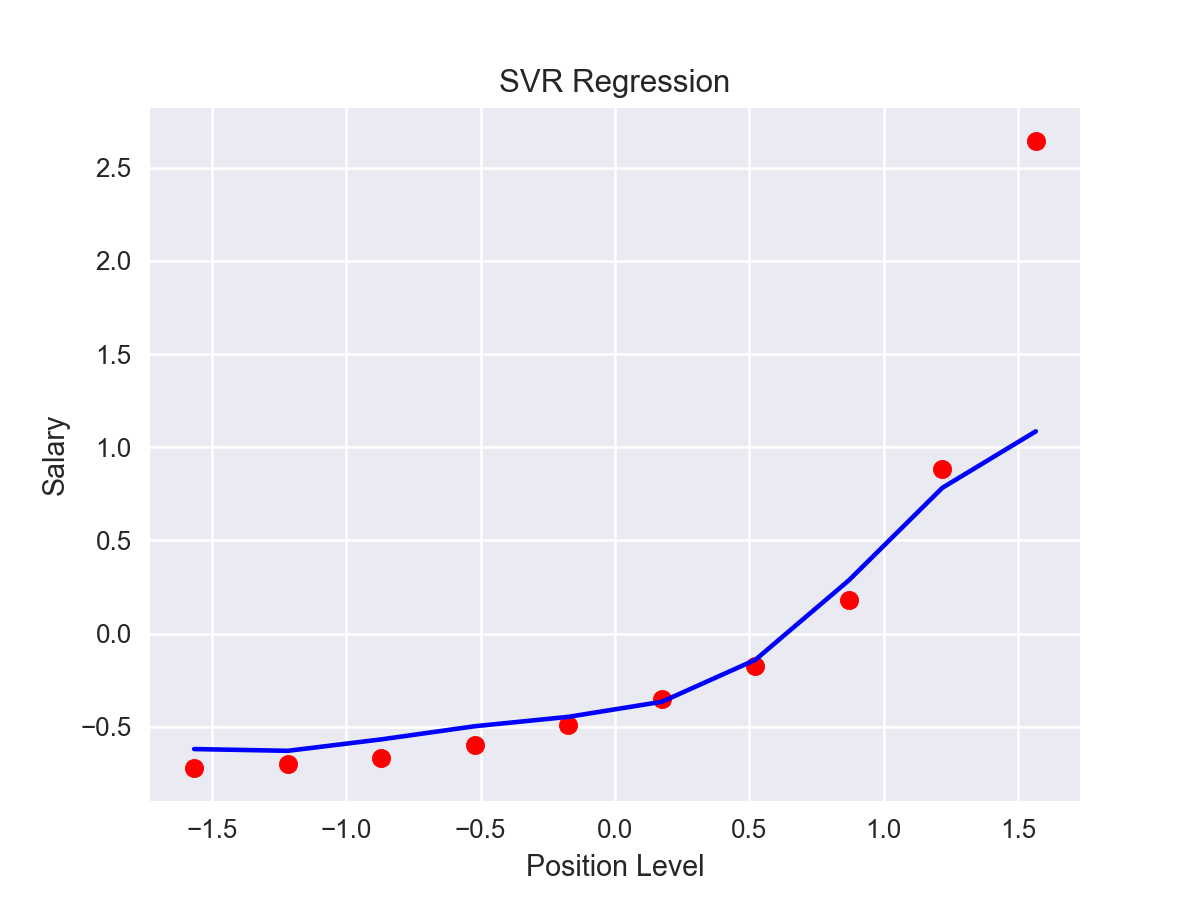

In [19]:
#Visualising the SVR Regression results
X_grid = np.arange(min(X_scaled), max(X_scaled), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'red')
plt.plot(X_scaled, svr_reg.predict(X_scaled), color = 'blue')
plt.title('SVR Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Decision Tree Regression Example

In [20]:
#Fitting the Decision Tree Regression to the data set
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor(random_state = 0) #Again look at documentation for various features. Taking default values for now
dec_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [21]:
y_pred = dec_reg.predict(6.5)

In [22]:
y_pred

array([ 150000.])

<IPython.core.display.Javascript object>


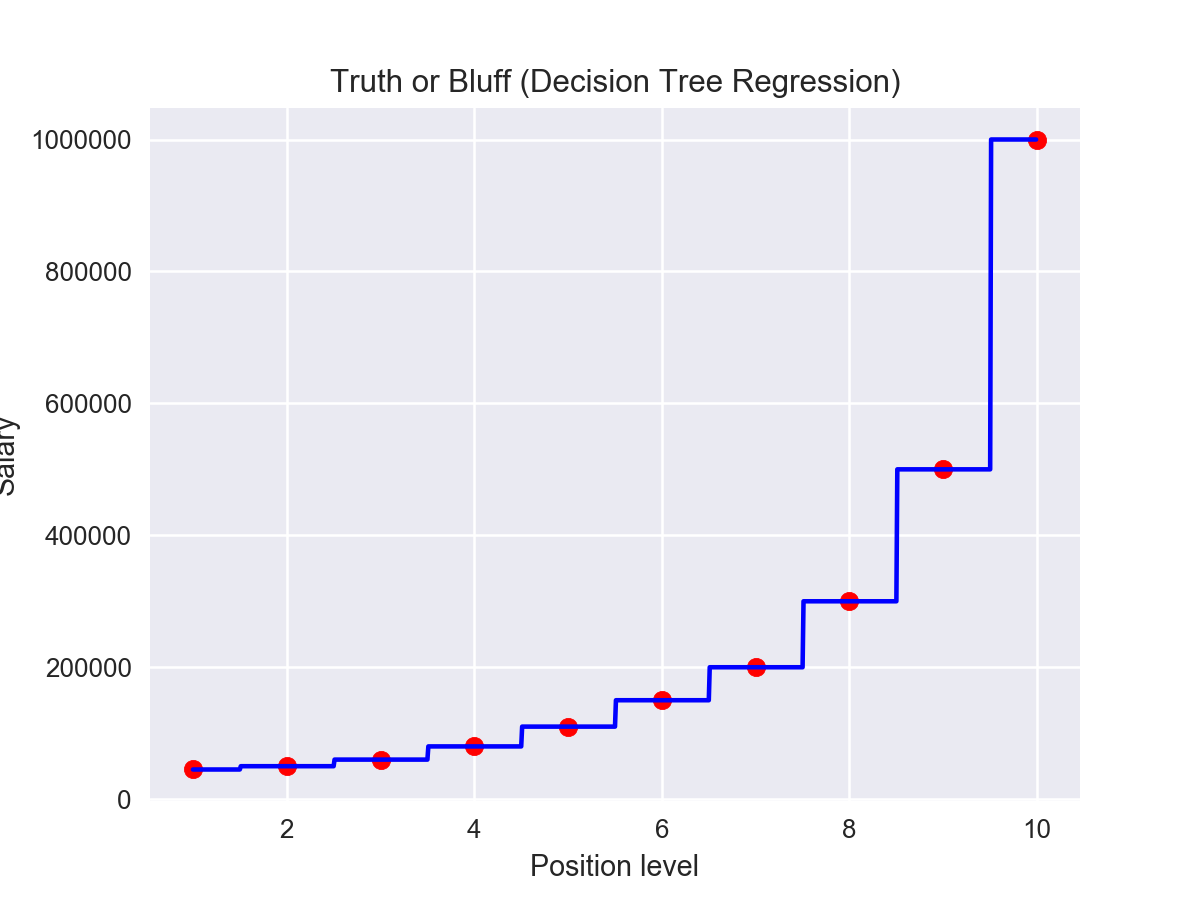

In [23]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01) # For better visualization of data
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, dec_reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Random Forest Regression example

In [24]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
ran_reg = RandomForestRegressor(n_estimators = 100, random_state = 0) # play with estimator parameters and see how it behaves
ran_reg.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [25]:
y_pred = ran_reg.predict(6.5)

In [26]:
y_pred

array([ 158300.])

<IPython.core.display.Javascript object>


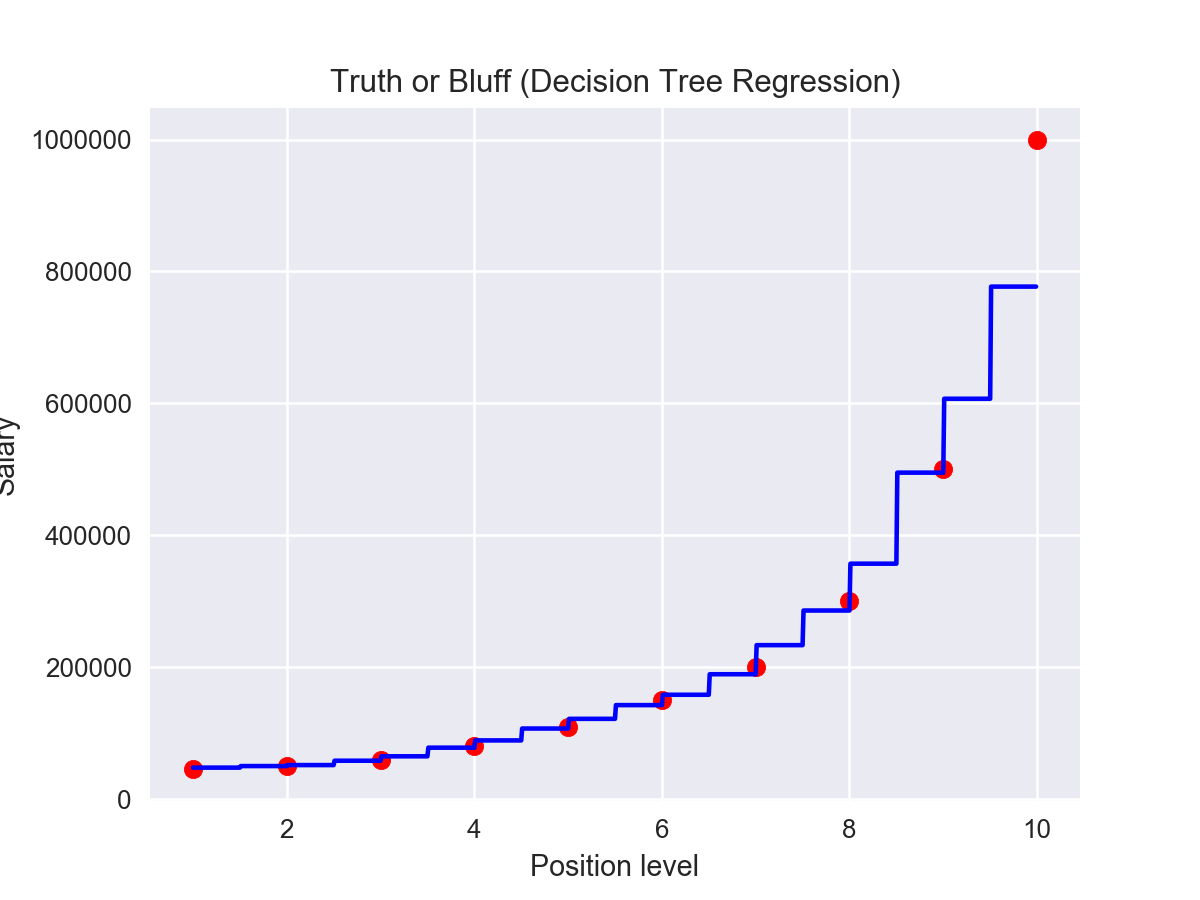

In [27]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, ran_reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()